<a href="https://colab.research.google.com/github/joamontesgi/SVM_colab/blob/main/Sin_selecci%C3%B3n_de_atributos_con_SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Drive
from google.colab import drive
drive.mount('/content/drive')

#Cálculo del tiempo
!pip install ipython-autotime
%load_ext autotime

#División en datos de prueba y entrenamiento
from sklearn.model_selection import train_test_split

# importar clasificador SVC 
from sklearn.svm import SVC

#Clasificador Perceptron multicapa
from sklearn.neural_network import MLPClassifier

# importar métricas para calcular la precisión
from sklearn.metrics import accuracy_score

#Pandas y NumPy
import numpy as np 
import pandas as pd

#Visualizar matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt

#Reporte de métricas
from sklearn.metrics import classification_report

#Métricas valor de confusión
from sklearn.metrics import confusion_matrix

#Se lee el dataset, el cual tiene 225745 registros
new_dataframe = pd.read_csv("/content/drive/MyDrive/Data/data.csv")
new_dataframe.shape



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(225745, 79)

time: 4.64 s (started: 2022-03-29 14:15:37 +00:00)


In [ ]:
#Pasando valores infinitos a NaN
new_dataframe.replace([np.inf, -np.inf], np.nan, inplace=True) 

#Eliminando valores NaN
new_dataframe=new_dataframe.dropna()
valoresNaN = new_dataframe.isnull().sum().sum()


time: 302 ms (started: 2022-03-29 14:15:42 +00:00)


In [ ]:
new_dataframe.shape

(225711, 79)

time: 7.43 ms (started: 2022-03-29 14:15:42 +00:00)


In [ ]:
#Se reemplazan valores en la columna de salida. 

#Ataque DDoS = 0
new_dataframe[' Label'] = new_dataframe[' Label'].replace('DDoS',0)

#Tráfico benigno = 1
new_dataframe[' Label'] = new_dataframe[' Label'].replace('BENIGN',1)

#Columna de salida
y = (new_dataframe[' Label'])

#Columnas de entrada
X = new_dataframe.iloc[:,0:-1]

time: 209 ms (started: 2022-03-29 14:15:42 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
X.shape

(225711, 78)

time: 3.33 ms (started: 2022-03-29 14:15:43 +00:00)


In [ ]:
y.shape

(225711,)

time: 6.06 ms (started: 2022-03-29 14:15:43 +00:00)


In [ ]:
#new_dataframe = new_dataframe.replace([np.inf, -np.inf], np.nan).dropna(axis=1)


time: 819 µs (started: 2022-03-29 14:15:43 +00:00)


In [ ]:
#new_dataframe = new_dataframe.iloc[:,0:-1]

time: 793 µs (started: 2022-03-29 14:15:43 +00:00)


In [ ]:
print(len(y))
print(len(X))

225711
225711
time: 1.47 ms (started: 2022-03-29 14:15:43 +00:00)


In [ ]:
X.shape

(225711, 78)

time: 4.6 ms (started: 2022-03-29 14:15:43 +00:00)


In [ ]:
y.shape

(225711,)

time: 3.95 ms (started: 2022-03-29 14:15:43 +00:00)


In [ ]:
#75% para entrenamiento, 25% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print('El total de registros de x para entrenamiento es :',(len(X_train)))
print('El total de registros de y para entrenamiento es :',(len(y_train)))
print('El total de registros de x para prueba es :',(len(X_test)))
print('El total de registros de y para prueba :',(len(y_test)))

El total de registros de x para entrenamiento es : 169283
El total de registros de y para entrenamiento es : 169283
El total de registros de x para prueba es : 56428
El total de registros de y para prueba : 56428
time: 242 ms (started: 2022-03-29 14:15:43 +00:00)


In [ ]:
#Se verifica la existencia de valores NaN
check_for_nan = new_dataframe.isnull().any().any()
print(check_for_nan)
d = np.isfinite(new_dataframe)
display(d)

False


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
225741,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
225742,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
225743,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


time: 127 ms (started: 2022-03-29 14:15:43 +00:00)


In [ ]:
#Mostrando columnas del dataset
col_names = new_dataframe.columns
col_names

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

time: 8.18 ms (started: 2022-03-29 14:15:43 +00:00)


In [ ]:
#Eliminando espacios en blanco en el nombre de cada columna
new_dataframe.columns = new_dataframe.columns.str.strip()

time: 1.96 ms (started: 2022-03-29 14:15:43 +00:00)


In [ ]:
#Mostrando las columnas del dataset
new_dataframe.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

time: 6.23 ms (started: 2022-03-29 14:15:43 +00:00)


In [ ]:
#Información sobre el dataset
new_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225711 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             225711 non-null  int64  
 1   Flow Duration                225711 non-null  int64  
 2   Total Fwd Packets            225711 non-null  int64  
 3   Total Backward Packets       225711 non-null  int64  
 4   Total Length of Fwd Packets  225711 non-null  int64  
 5   Total Length of Bwd Packets  225711 non-null  int64  
 6   Fwd Packet Length Max        225711 non-null  int64  
 7   Fwd Packet Length Min        225711 non-null  int64  
 8   Fwd Packet Length Mean       225711 non-null  float64
 9   Fwd Packet Length Std        225711 non-null  float64
 10  Bwd Packet Length Max        225711 non-null  int64  
 11  Bwd Packet Length Min        225711 non-null  int64  
 12  Bwd Packet Length Mean       225711 non-null  float64
 13 

In [ ]:
#Verificando la ausencia de valores nulos
new_dataframe.isnull().sum()

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 79, dtype: int64

time: 37.2 ms (started: 2022-03-29 14:15:43 +00:00)


In [ ]:
#Valores de entrada
X.shape

(225711, 78)

time: 6.86 ms (started: 2022-03-29 14:15:43 +00:00)


In [ ]:
#Valores de salida
y.shape

(225711,)

time: 7.19 ms (started: 2022-03-29 14:15:43 +00:00)


***Clasificación de Vectores de Soporte***


***Clasificación de Vectores de Soporte - Hiperparámetros por default***

In [ ]:
# Iniciando el clasificador con hiperparámetros por default
svc=SVC() 

#seleccionando entrenamiento para valores de entrada y salida
my_model_default=svc.fit(X_train,y_train)

# Predicciones
y_pred=svc.predict(X_test)

time: 33min 28s (started: 2022-03-29 14:15:43 +00:00)


In [ ]:

#Mostrando la precisión
print('Puntuación de precisión del modelo con hiperparámetros por defecto: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
#Mostrando el reporte 
print(classification_report(y_test, y_pred))

Puntuación de precisión del modelo con hiperparámetros por defecto: 0.9356
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     32141
           1       0.94      0.91      0.92     24287

    accuracy                           0.94     56428
   macro avg       0.94      0.93      0.93     56428
weighted avg       0.94      0.94      0.94     56428

time: 128 ms (started: 2022-03-29 14:49:12 +00:00)


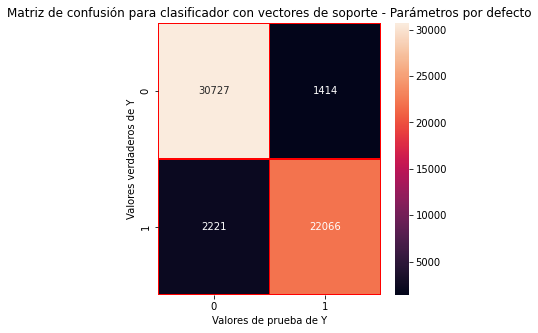

time: 5min (started: 2022-03-29 14:49:12 +00:00)


In [ ]:
#Generando los valores para la matriz de confusión
y_pred=my_model_default.predict(X_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Graficando la matriz 
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Valores de prueba de Y")
plt.ylabel("Valores verdaderos de Y")
plt.title("Matriz de confusión para clasificador con vectores de soporte - Parámetros por defecto")
plt.show()

***Clasificación de Vectores de Soporte - Kernel RBF y C=100 ***

In [ ]:
# Iniciando el clasificador con un kernel RBF y C=100 
svc=SVC(C=100.0) 

#seleccionando entrenamiento para valores de entrada y salida
my_model_100=svc.fit(X_train,y_train)

#Generando predicciones
y_pred=svc.predict(X_test)

#Mostrando la precisión
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Model accuracy score with rbf kernel and C=100.0 : 0.9601
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     32141
           1       0.96      0.94      0.95     24287

    accuracy                           0.96     56428
   macro avg       0.96      0.96      0.96     56428
weighted avg       0.96      0.96      0.96     56428

time: 17min 56s (started: 2022-03-29 14:54:13 +00:00)


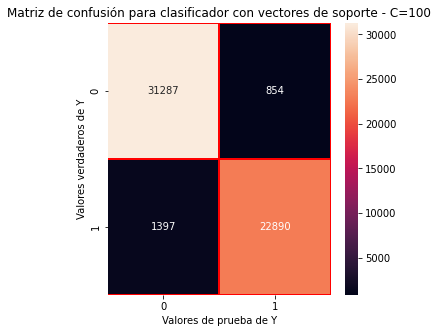

time: 2min 51s (started: 2022-03-29 15:12:09 +00:00)


In [ ]:
#Generando los valores para la matriz de confusión
y_pred=my_model_100.predict(X_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Graficando la matriz 
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Valores de prueba de Y")
plt.ylabel("Valores verdaderos de Y")
plt.title("Matriz de confusión para clasificador con vectores de soporte - C=100")
plt.show()

***Clasificación de Vectores de Soporte - Kernel RBF y C=1000 ***



In [ ]:
# Iniciando el clasificador con un kernel RBF y C=1000 
svc=SVC(C=1000.0) 

#seleccionando entrenamiento para valores de entrada y salida
my_model_1000=svc.fit(X_train,y_train)

#Generando predicciones
y_pred=svc.predict(X_test)

#Mostrando la precisión
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Model accuracy score with rbf kernel and C=1000.0 : 0.9859
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     32141
           1       0.97      1.00      0.98     24287

    accuracy                           0.99     56428
   macro avg       0.98      0.99      0.99     56428
weighted avg       0.99      0.99      0.99     56428

time: 13min 2s (started: 2022-03-29 15:15:00 +00:00)


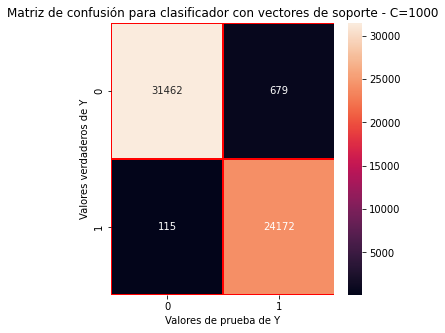

time: 1min 35s (started: 2022-03-29 15:28:03 +00:00)


In [ ]:
#confusion matrix visualization
y_pred=my_model_1000.predict(X_test)
y_true=y_test

#Graficando la matriz 
cm=confusion_matrix(y_true,y_pred)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Valores de prueba de Y")
plt.ylabel("Valores verdaderos de Y")
plt.title("Matriz de confusión para clasificador con vectores de soporte - C=1000")
plt.show()